In [16]:
#TITLE: A Machine Learning Approach for the Classification of Cardiac Arrhythmia
#STUDENT NAME: João Pedro da Silva Esteves
#JMBAG: 

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data'

First, get data frame from the .data file of arrhythmia, with features named from 0 to 279, using pandas' read_csv()
Feature 279 is actually the 'targets'

In [18]:
lst = range(0,280)
raw_data = pd.read_csv(url, names = lst, na_values='?')

Separating the features from the targets...

In [19]:
ft_data = raw_data.loc[:, lst[:-1]].values
target_data = raw_data.loc[:, lst[-1]].values

Standardizing the features' numerical data...

In [20]:
scaler = StandardScaler()
ft_data = scaler.fit_transform(ft_data)


In [26]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
ft_data = imp.fit_transform(ft_data)

pca = PCA(n_components=150)
principal_components = pca.fit_transform(ft_data)

lst = range(150)

principal_ft_data = pd.DataFrame(data = principal_components, columns = lst)
principal_ft_data

           0          1         2          3         4         5          6    \
0     1.369869  -0.028621 -2.181240  -0.308246 -1.249854 -0.614914  -3.049861   
1     0.000875   1.311179 -2.608008  -2.863947 -1.452317  0.838703   0.061636   
2    -5.302199 -10.260543 -0.976826   1.566401  6.031283  7.549582  11.675577   
3     0.120265   2.258963 -2.528376  -1.920754  3.137857  0.135137   0.618345   
4     1.613108  -1.395706 -2.122589  -2.161265 -0.885634 -0.247326  -0.798531   
..         ...        ...       ...        ...       ...       ...        ...   
447   8.200332  -2.620797  0.351683  -2.374859 -0.699728  0.811404  -1.345651   
448  -7.778414   1.557377  0.247272  -1.932862  4.085983 -0.294325   0.196106   
449  17.465698 -17.061780 -6.177656  10.639899  8.653360  8.656899  -0.372288   
450  -3.298163   2.738681 -2.361979  -1.252887  1.851596 -1.172423  -0.282926   
451  -1.440377  -0.021431 -3.488494   0.336195 -0.012930  0.589044  -0.274625   

          7         8      

In [22]:
target_data_df = pd.DataFrame(target_data)
final_df = pd.concat([principal_ft_data, target_data_df], axis = 1)

NameError: name 'final_data' is not defined

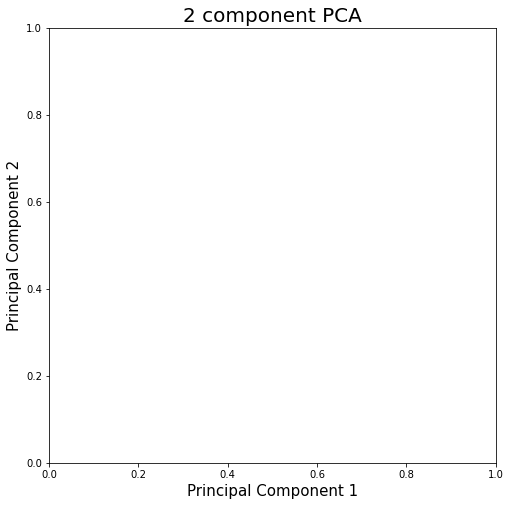

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = range(16)
colors = cm.rainbow(np.linspace(0, 1, len(targets)))
for target, color in zip(targets,colors):
    indicesToKeep = final_data.columns[-1] == target
    ax.scatter(final_data.loc[indicesToKeep, 'principal component 1'], final_data.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()